In [26]:
from time import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix


In [8]:
 df = pd.read_csv('c:/heart.csv')
 

In [9]:
df.shape

(14, 4)

In [10]:
df.describe

<bound method NDFrame.describe of     highbp  highcholestrol  FBPS  Target
0        1               1     1       1
1        1               1     0       1
2        1               1     0       1
3        0               1     0       0
4        0               1     0       0
5        1               0     0       0
6        1               1     0       1
7        0               1     0       0
8        1               0     1       1
9        1               0     0       0
10       1               1     0       1
11       1               1     0       1
12       1               1     0       1
13       0               1     0       0>

In [12]:
X = df.drop(columns=['Target'])
y = df['Target']
print(X.shape)
print(y.shape)

(14, 3)
(14,)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(10, 3)
(4, 3)


In [17]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

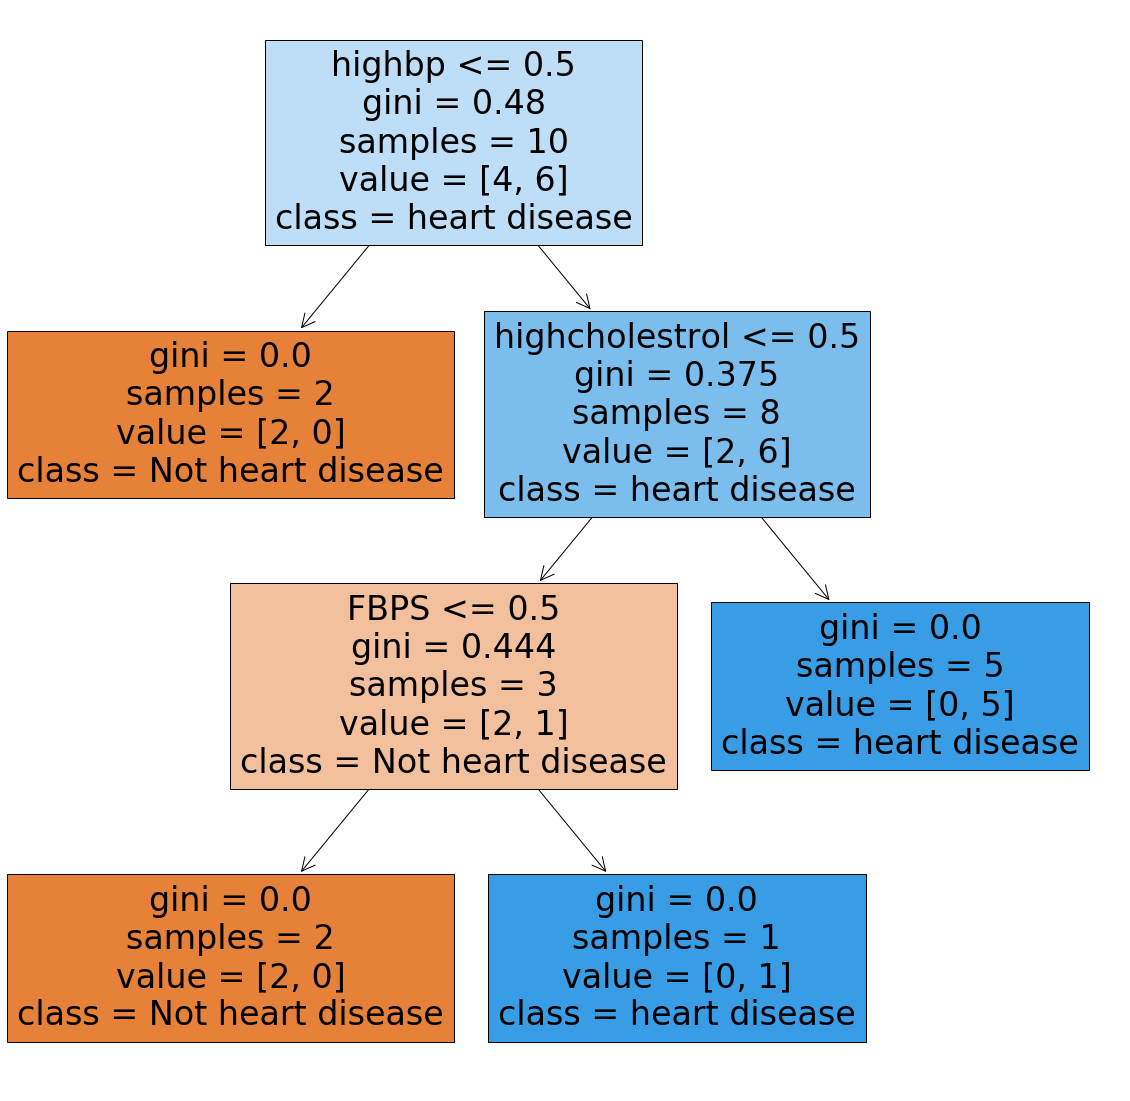

In [18]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [23]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    

Train score 1.0
Test score 1.0
Train Confusion matrix


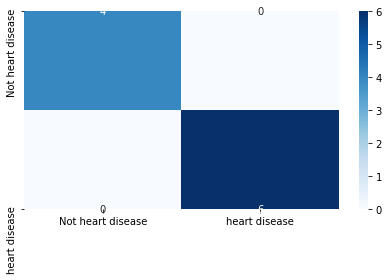

Test Confusion matrix


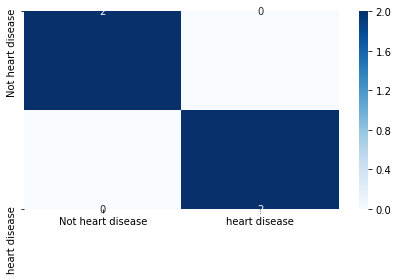

In [27]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')